# Artificial Intelligence 🪐
# CA 1


# Amirali Shahriary (810100173)

## Intro:
in this project, we are going to solve the pseudo knapsack problem using a Genetic algorithm.

the problem is about snacks and their weight and values in which they should satisfy some of the parameters and we try to model it using a genetic algorithm and find the best answer.

### Part 0: Libraries and Testing parameters

In this part, we import the necessary libraries in the project and also give the value to the testing parameters that will be explained further in this notebook about.

In [44]:
import csv
import random
import matplotlib.pyplot as plt

In [45]:
# for testing parameters
max_weight = 10
min_value = 12
min_types = 2
max_types = 4
population_size = 200
generations = 1000

### Part 1: Define basic concepts

in this part the Procedure is like below :
 First, we define the Gene class to represent a single food item
 Then define the Chromosome class to represent a selection of food items
And finally, Implement a function to load food items from CSV file , i also make it to print what we have in the csv file.
By the defenition of generation in Genetic Algorithm, Every generation, is made of some chromosomes. Therfore the implementation of Chromosome and Generation is like this

In [46]:
# gene class for food item
class Gene:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

# Chromosome class for selection of food items
class Chromosome:
    def __init__(self, genes):
        self.genes = genes
        self.total_weight = sum(gene.weight for gene in genes)
        self.total_value = sum(gene.value for gene in genes)

# load  CSV 
def load_food_items(filename):
    food_items = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # to ignore header
        for row in reader:
            name, weight, value = row
            food_items.append(Gene(name, float(weight), float(value))) # based on description they should be float
    return food_items

food_items = load_food_items('snacks.csv')
for gene in food_items:
    print(gene.name, gene.weight, gene.value)

MazMaz 10.0 10.0
Doogh-e-Abali 15.0 10.0
Nani 5.0 5.0
Jooj 7.0 15.0
Hot-Dog 20.0 15.0
Chips 8.0 6.0
Nooshaba 12.0 8.0
Shokolat 6.0 7.0
Chocoroll 9.0 12.0
Cookies 11.0 11.0
Abnabat 4.0 4.0
Adams-Khersi 14.0 9.0
Popcorn 16.0 13.0
Pastil 3.0 7.0
Tordilla 10.0 9.0
Masghati 5.0 6.0
Ghottab 7.0 10.0
Saghe-Talaei 9.0 11.0
Choob-Shoor 13.0 12.0


### Part 2: Generate the primary Generation

in this part, you can see the Implementation of the function to generate the initial population satisfying constraints this is our first generation. It also printed the initial population to see how it is generated and how the process goes.


In [47]:
def generate_initial_population(food_items, max_weight, min_value, min_types, max_types, population_size):
    initial_population = []
    while len(initial_population) < population_size:
        # randomly  genes for chromosome
        chromosome_genes = []
        total_weight = 0
        total_value = 0
        for gene in food_items:
            if random.random() < 0.5:  # randome decide where to include the food item
                fraction = random.uniform(0.1, 1.0) 
                if total_weight + gene.weight * fraction <= max_weight:
                    chromosome_genes.append(Gene(gene.name, gene.weight * fraction, gene.value * fraction))
                    total_weight += gene.weight * fraction
                    total_value += gene.value * fraction
        # chromosome satisfiction
        if total_weight <= max_weight and total_value >= min_value \
                and min_types <= len(chromosome_genes) <= max_types:
            initial_population.append(Chromosome(chromosome_genes))
    return initial_population

initial_population = generate_initial_population(food_items, max_weight, min_value, min_types, max_types, population_size)
for idx, chromosome in enumerate(initial_population):
    print(f"Chromosome {idx + 1}:")
    for gene in chromosome.genes:
        print(f"{gene.name}: {gene.weight:.2f}")
    print(f"Total Weight: {chromosome.total_weight:.2f}")
    print(f"Total Value: {chromosome.total_value:.2f}")
    print("★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★")

Chromosome 1:
Jooj: 2.54
Chips: 1.60
Shokolat: 5.26
Total Weight: 9.40
Total Value: 12.79
★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Chromosome 2:
Jooj: 2.62
Abnabat: 2.68
Tordilla: 4.23
Total Weight: 9.53
Total Value: 12.11
★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Chromosome 3:
Nani: 3.35
Jooj: 3.87
Pastil: 2.14
Total Weight: 9.36
Total Value: 16.64
★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Chromosome 4:
MazMaz: 2.67
Nani: 3.66
Jooj: 2.89
Total Weight: 9.22
Total Value: 12.52
★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Chromosome 5:
Nani: 1.54
Jooj: 3.40
Shokolat: 1.52
Pastil: 1.90
Total Weight: 8.36
Total Value: 15.03
★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Chromosome 6:
MazMaz: 1.08
Jooj: 5.85
Shokolat: 0.67
Total Weight: 7.61
Total Value: 14.41
★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Chromosome 7:
MazMaz: 2.87
Jooj: 6.96
Total Weight: 9.83
Total Value: 17.79
★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★
Chromosome 8:
Nani: 4.87


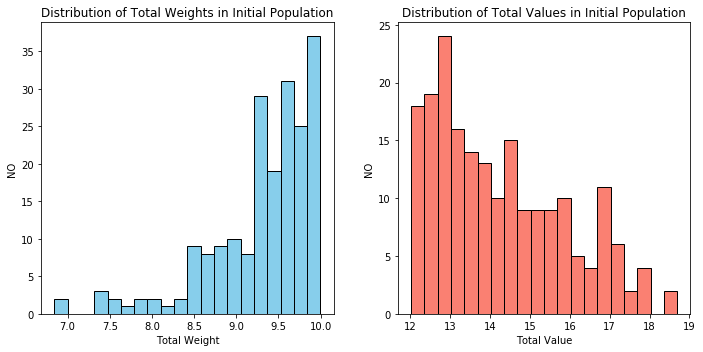

In [48]:
def visualize_initial_population(initial_population):
    total_weights = [chromosome.total_weight for chromosome in initial_population]
    total_values = [chromosome.total_value for chromosome in initial_population]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(total_weights, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Total Weights in Initial Population')
    plt.xlabel('Total Weight')
    plt.ylabel('NO')

    plt.subplot(1, 2, 2)
    plt.hist(total_values, bins=20, color='salmon', edgecolor='black')
    plt.title('Distribution of Total Values in Initial Population')
    plt.xlabel('Total Value')
    plt.ylabel('NO')

    plt.tight_layout()
    plt.show()
    
    
    
visualize_initial_population(initial_population)

### Part 3: Defenition and Implementation of Fitness Function

In this part of the project, we are going to Implement a function to calculate the score of a chromosome using its total weight compared with max weight and then increase the score based on that.
the second function is to Implement the compatibility criterion function that returns the score by calling calculate_score

In [49]:
def calculate_score(chromosome, max_weight, min_value, min_types, max_types):
    score = 0
    if chromosome.total_weight <= max_weight:
        score += chromosome.total_value
    return score

def compatibility_criterion(chromosome, max_weight, min_value, min_types, max_types):
    score = calculate_score(chromosome, max_weight, min_value, min_types, max_types)
    return score

### Part 4 : implementation of crossover and mutation and production of the next generation

now in this part implement the crossover function and mutation functions for crossover by giving two parents and inputs we choose a random crossover point with the help of a random library and then Create offspring by combining genes from parents based on the rules of the genetic algorithm. in the mutex function, we give the function chromosome and mutation rate that we can change during the tests.
The mutation rate in a genetic algorithm represents the probability that any given gene in a chromosome will undergo a mutation during reproduction. It determines how often mutations occur in the population during the evolutionary process.
In genetic algorithms, mutation is a mechanism that introduces random changes to individual chromosomes in the population. These changes help in exploring new regions of the search space and can prevent premature convergence to suboptimal solutions.
then in the loop, while we are crossing through each gene in chromosomes genes with condition part we mutate the gene by changing its weight and value slightly and finally return mutated_chromosome

In [50]:
def crossover(parent1, parent2):
    # random crossover point
    crossover_point = random.randint(1, min(len(parent1.genes), len(parent2.genes)) - 1)
    
    # combine genes from parents and offspring by combining genes from parents
    offspring_genes = parent1.genes[:crossover_point] + parent2.genes[crossover_point:]
    
    # Remove duplicates
    seen_genes = set()
    unique_genes = []
    for gene in offspring_genes:
        if gene.name not in seen_genes:
            unique_genes.append(gene)
            seen_genes.add(gene.name)
    
    offspring = Chromosome(unique_genes)
    return offspring


def mutation(chromosome, mutation_rate=0.2):
    mutated_genes = []
    gene_names = set()  
    
    for gene in chromosome.genes:
        if random.random() < mutation_rate:
            # changing its weight and value 
            mutated_weight = min(gene.weight * random.uniform(0.8, 1.2), gene.weight)
            mutated_value = min(gene.value * random.uniform(0.8, 1.2), gene.value)
            #mutated_weight = min(gene.weight * random.uniform(0.9, 1.1), gene.weight)
            #mutated_value = min(gene.value * random.uniform(0.9, 1.1), gene.value)

            mutated_gene = Gene(gene.name, mutated_weight, mutated_value)
            
            # check for duality for name of snack
            if mutated_gene.name not in gene_names:
                mutated_genes.append(mutated_gene)
                gene_names.add(mutated_gene.name)
        else:
            mutated_genes.append(gene)
            gene_names.add(gene.name)
    
    mutated_chromosome = Chromosome(mutated_genes)
    return mutated_chromosome



### Part 5: Apply Genetic Algorithm on Problem

Now in this part as the main part of our algorithm, we apply the genetic algorithm function, first, we store initial_population in population then Initialize variables to track the best solution and its score, in the loop, we Iterate over the specified number of generations and Filter the population based on the compatibility criterion and Select a mating pool from the filtered population and then by this procedure generate next generation and update the generation with the next generation; finally Update the best solution and its score based on the new population and be able to return best solution and its score

In [51]:
def genetic_algorithm(food_items, max_weight, min_value, min_types, max_types, population_size, generations):
    population = generate_initial_population(food_items, max_weight, min_value, min_types, max_types, population_size)
    
    best_chromosome = None
    best_score = 0
    
    for generation in range(generations):
        population = [chromosome for chromosome in population if compatibility_criterion(chromosome, max_weight, min_value, min_types, max_types)]
        
        mating_pool = random.sample(population, min(2, len(population)))
        
        next_generation = []
        while len(next_generation) < population_size:
            parent1, parent2 = random.choices(mating_pool, k=2)
            offspring = crossover(parent1, parent2)
            offspring = mutation(offspring)
            next_generation.append(offspring)
            if len(offspring.genes) <= max_weight and len(offspring.genes) >= min_value \
                and min_types <= len(chromosome_genes) <= max_types:
                next_generation.append(offspring)
        
        population = next_generation
        
        for chromosome in population:
            score = calculate_score(chromosome, max_weight, min_value, min_types, max_types)
            if score > best_score:
                best_chromosome = chromosome
                best_score = score
    
    return best_chromosome, best_score

### Part 6: Evaluation of the results

In the final step, we just need to load and run the functions we built previously and print the wanted answer and finally show the evaluation of the value achieved over generations.

In [60]:
#food_items = load_food_items('snacks.csv')

best_solution, best_score = genetic_algorithm(food_items, max_weight, min_value, min_types, max_types, population_size, generations)

print("\nBest Solution:")
for gene in best_solution.genes:
    print(f"{gene.name}: {gene.weight:.2f}")
print(f"Total Weight: {best_solution.total_weight:.2f}")
print(f"Total Value: {best_solution.total_value:.2f}")
#print(f"Score: {best_score:.2f}") # optional


Best Solution:
MazMaz: 1.98
Jooj: 5.63
Pastil: 2.24
Total Weight: 9.85
Total Value: 19.27


#### ─── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ──

# Questions: 

### 1 :What problems do very small or very large initial populations cause?

if there are too many individuals in the population, the algorithm becomes slower and takes a long time to find a solution in fact efficiency gets ruined. On the flip side, if the population is too small, there's not enough variety, making the algorithm take more steps to find a solution because the variety of chromosomes decreases. It might reach a point quickly, but we want to avoid getting stuck there by introducing good changes gradually. at all, we need a good trade-off

### 2: If the number of population increases in each period, what effect does it have on the accuracy and speed of the algorithm?
The issue we're encountering is that as the algorithm progresses, it slows down due to the increasing population size. Consequently, the speed decreases. However, the impact on the algorithm's accuracy is up for debate. It hinges on how we generate the additional new chromosomes. If we include both the crossover result and parents, or if we add the mutation result to the chromosome itself, we face the same problem: the added chromosomes aren't significantly different from the previous ones. The downside here is that we end up lacking both the precision of a large population and the speed of a small population.

### 3: State and compare the effect of each of the crossover and mutation operations. Can only one of them be used? Why?

Cross over is intended to merge two strong chromosomes, producing offspring that compensate for each parent's weaknesses. Ideally, we generate one or more children that surpass both parents in quality. Conversely, mutation targets chromosomes with mostly good genes but are marred by a single or few bad genes. By altering these unfavorable genes through mutation, we can greatly improve the chromosome.

Crossover is given a higher probability compared to mutation. It's crucial to utilize both operations because each serves a unique purpose and cannot substitute the other. Relying solely on crossover may result in being trapped in a local maximum. Conversely, relying solely on mutation leads to inconsistent improvements in each generation. Attempting to address this by increasing the mutation probability leads to a new issue: the algorithm loses its genetic algorithm essence and becomes essentially a random generation process. In such a scenario, the algorithm explores the entire state space.


### 4: In your opinion, what solutions are there to get answers to this particular problem faster?

Adjusting the hyperparameters and assigning suitable values to each of them is the most effective method to improve the algorithm's speed.

### 5: Despite the use of these methods, it is still possible that the chromosomes do not change after several steps. Explain the reason for this and the problems it causes. What do you suggest to solve it?


This effect occurs because the algorithm gets stuck in a local maximum when the chromosomes are too similar. Mutation is specifically designed to address this issue. One solution is to increase the likelihood of mutation. Another approach is to restart the algorithm multiple times with a new initial generation.

### 6: What solution do you suggest to finish the program if the problem is not answered?

We can address this issue by introducing a hyperparameter called "maxGenerations," which sets a limit on the number of algorithm steps. This approach aligns well with the multi-start strategy mentioned earlier.

#### ─── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ───── ⋆⋅☆⋅⋆ ──